In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [4]:
train = pd.read_csv("/Users/peterhng/Downloads/Udemy - Python for Data Science and Machine Learning Bootcamp/1. Course Introduction/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv")

In [5]:
 train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


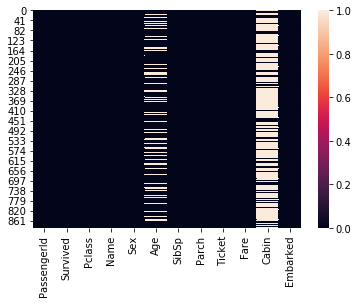

In [13]:
sns.heatmap(train.isnull())

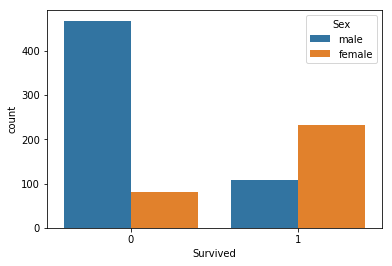

In [16]:
sns.countplot(x="Survived", hue="Sex", data=train)

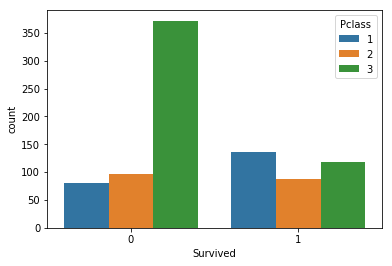

In [17]:
sns.countplot(x="Survived", hue="Pclass", data=train)

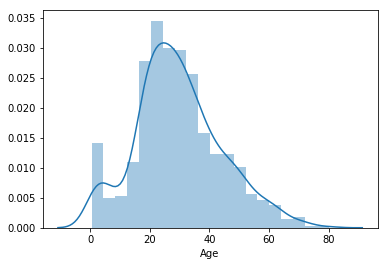

In [19]:
sns.distplot(train['Age'].dropna())

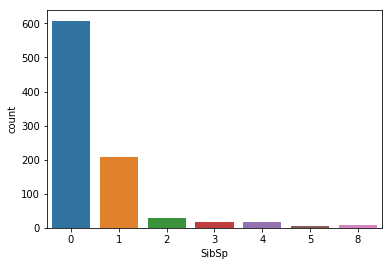

In [23]:
sns.countplot(x='SibSp', data=train)

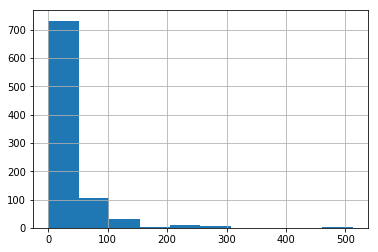

In [24]:
train["Fare"].hist()

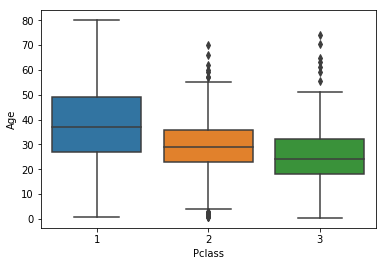

In [26]:
sns.boxplot(x="Pclass", y="Age", data=train)

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1: 
            return 37
        elif Pclass == 2:
            return 29 
        else:
            return 24
    else:
        return Age 

In [32]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age, axis=1)

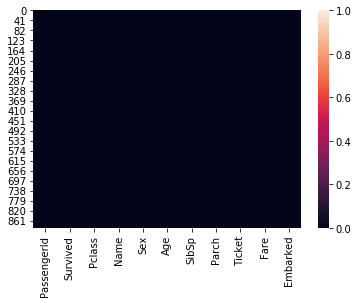

In [38]:
sns.heatmap(train.isnull())

In [34]:
train.drop("Cabin", axis=1, inplace= True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [39]:
train.dropna(inplace=True) #deleting rows itt a axis=0 by default

In [6]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [16]:
train = pd.concat([train,sex,embark], axis=1)

TypeError: concat() got an unexpected keyword argument 'inplace'

In [17]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0


In [15]:
#Getting rid of the columns 

train.drop(["Sex","Embarked","Name","Ticket"], axis=1, inplace = True)

In [18]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
886,887,0,2,27.0,0,0,13.00,NaN,1,0,1
887,888,1,1,19.0,0,0,30.00,B42,0,0,1
888,889,0,3,NaN,1,2,23.45,NaN,0,0,1
889,890,1,1,26.0,0,0,30.00,C148,1,0,0
890,891,0,3,32.0,0,0,7.75,NaN,1,1,0


In [62]:
train.drop(["PassengerId"], axis=1, inplace = True)

In [63]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1,1,0,1
1,1,1,37,1,0,71.2833,0,0,0,0,0,0


In [64]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [71]:
from sklearn.cross_validation import train_test_split #ez már nem jó 

In [19]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.linear_model import LogisticRegression 

In [75]:
logmodel = LogisticRegression()

In [76]:
logmodel.fit(X_train, y_train)

/Users/peterhng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
predictions = logmodel.predict(X_test)

In [78]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 36,  68]])